Up to the section `KL divergence` has been refered in
https://github.com/Nhan121/Some-statistical-GANs-simulations-drafts-/blob/master/Some_basic_distance/KL%20divergence.ipynb

The `JS-`divergence between 2 probability distribution $P, Q$ defined as
$$ d_{JS}(p, q) = \frac{1}{2} \left( d_{KL}\left(p \left \Vert \frac{p+q}{2} \right. \right) + d_{KL}\left( q \left \Vert \frac{p+q}{2} \right. \right) \right) $$

In [1]:
import numpy as np
import scipy.stats as sst
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Define a function
def JS_divergence(p, q):
    return ( sst.entropy(p, (p+q)/2 ) + sst.entropy(q, (p+q)/2 ))/2

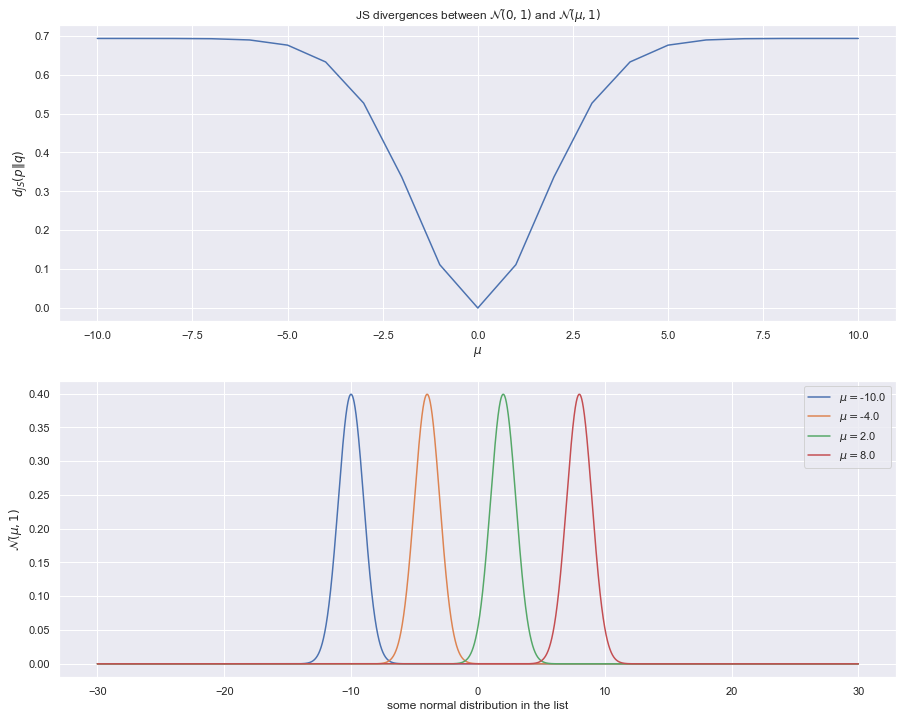

In [3]:
# Let the partitions = 201 points.
n_pat = 201
a, b = -30, 30
x = np.arange(a, b, 1/n_pat)

## Fix p to the random-variables generated by the standard-normal distribution
p = sst.norm.pdf(x, 0, 1)

## Initialize the KL-divergence of P from Q
dPQ = []

## Create the array of the mean of the normal distributions's sequence
muy = np.linspace(-10, 10, 21)
for mu in muy:
    qk = sst.norm.pdf(x, mu, 1)
    dPQ.append(JS_divergence(p, qk))

## Set the size of figure    
sns.set(rc = {"figure.figsize" : (15, 12)})

## Show the d_JS on the top of the figure
plt.subplot(211)    
plt.plot(muy, dPQ)

## Add the title and labels
plt.title('JS divergences between $\mathcal{N}(0,1)$ and $\mathcal{N}(\mu, 1)$')
plt.ylabel('$d_{JS}(p \Vert q)$')
plt.xlabel('$\mu$')

## Show a few distributions in the normal distribution sequences N(mu_k, 1)
plt.subplot(212)
for mu in muy[::6]:
    plt.plot(x, sst.norm.pdf(x, mu, 1), label = '$\mu = $'+str(mu))
    plt.legend(loc = 'upper right')

## Add the x,y_labels    
plt.ylabel('$\mathcal{N}(\mu, 1)$')
plt.xlabel('some normal distribution in the list')
plt.show()

**Comment.** 
- 1) When the value of mean $\mu = 0,$ that mean $q(x) = \mathcal{N}(0, 1) = p(x)$ and hence $d_{JS}(p, q) = 0$. 

- 2) When $\mu = \pm 7.5$ then $d_{JS}$ is around $0.7$, When $\vert \mu \vert > 7.5$, we can see that the `JS-divergence` in this case is stable and bounded by $0.7$ ?? 


**Explain.**

2) Well, this is OK. In fact, the upper-bound of `JS-divergence` is $\log(2) \approx 0.693$ (the natural logarithm) for all distributions.

Indeed, for any probability distributions, we have
$$ \begin{array}{cll} d_{JS}(p, q) &=& \displaystyle \frac{1}{2} \int \left[ p \log \left( \frac{2p}{p+q} \right) + q \log\left( \frac{2q}{p+q} \right) \right] d\nu \\ & \leq & \displaystyle \frac{1}{2} \max \left\lbrace \log \frac{2p}{p+q}, \log \frac{2q}{p+q} \right\rbrace \left( \int (p+q) d\nu \right) \leq \log 2. \end{array} $$

This distance is always bounded even if the `KL-divergence` is infinity. As we known, for $p = \mathcal{N}(0, 1)$ and $q = \mathcal{E}(1)$, then
$$d_{KL}(q \Vert p) = \sqrt{2\pi} \int_0^{\infty} \left( \frac{x^2 - 2x}{2} \right) e^{-x} dx \approx 1.608$$
is well-defined, while
$$d_{KL}(p \Vert q) = \infty $$
but 
$$ d_{JS}(p, q) \approx 0.47 $$

In [4]:
p = sst.norm.pdf(x, 0, 1)
q = sst.expon.pdf(x, 1)
JS_divergence(p, q)

0.4743690367584173

**Remark.** 
- 1) In fact, the `Kullback Leibler divergence` is used more often than the `Jensen Shannon` even if the `Kullback-Leibler` has a few nice properties. 
- 2) The square root of `JS-divergence` is defined a metric.